In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Function To Plot Absolute Error Of The Estimate At Every Time Step 't', After All The 2000 Trials.

In [2]:

def abs_estimate_plotter(N_time, R_time):
    #Let's find the mean of an arm at every time 't'

    # R_time contains sum of rewards for all 10 arms individualy at every time step t
    estimate= np.zeros((10,1000))
    error_in_estimate= np.zeros((10,1000))
    for arm in range(10):
        for t in range(1000):

            if(N_time[arm][t]!=0):
                estimate[arm][t]= R_time[arm][t]/N_time[arm][t]
            else:
                estimate[arm][t]=0

            error_in_estimate[arm][t]= abs(estimate[arm][t]-true_mean_for_ten_arms[arm])

    plt.style.use('dark_background')
    
    print("ABSOLUTE ERROR OF EACH ARM AT EVERY TIME STEP 't'")
    plt.figure(1)


    plt.subplot(5,2,1)
    plt.plot(range(1000), error_in_estimate[0])
    plt.title('arm 1')
    plt.show()

    plt.subplot(5,2,2)
    plt.plot(range(1000), error_in_estimate[1])
    plt.title('arm 2')
    plt.show()


    plt.subplot(5,2,3)
    plt.plot(range(1000), error_in_estimate[2])
    plt.title('arm 3')
    plt.show()

    plt.subplot(5,2,4)
    plt.plot(range(1000), error_in_estimate[3])
    plt.title('arm 4')
    plt.show()

    plt.subplot(5,2,5)
    plt.plot(range(1000), error_in_estimate[4])
    plt.title('arm 5')
    plt.show()

    plt.subplot(5,2,6)
    plt.plot(range(1000), error_in_estimate[5])
    plt.title('arm 6')
    plt.show()

    plt.subplot(5,2,7)
    plt.plot(range(1000), error_in_estimate[6])
    plt.title('arm 7')
    plt.show()

    plt.subplot(5,2,8)
    plt.plot(range(1000), error_in_estimate[7])
    plt.title('arm 8')
    plt.show()

    plt.subplot(5,2,9)
    plt.plot(range(1000), error_in_estimate[8])
    plt.title('arm 9')
    plt.show()

    plt.subplot(5,2,10)
    plt.plot(range(1000), error_in_estimate[9])
    plt.title('arm 10')
    plt.show()


# Picking the True Mean for ten arms

In [3]:
#This will be the true mean for our arms and we will create the distributions for each arm using the mean coresponding to that arm.
#Variance remains 1, for reward distribution of the arm.
true_mean_for_ten_arms=np.random.randn(10)


# CASE 0
## Epsilon=0 (100% EXPLOITATION)

In [4]:

#if two arms have the same Q value, then we will prefer the arm at the lower index.
#players are independent of each other, hence we reset all values for every player.
#Assuming 'e' will only have 2 decimal points. ==> 0.xy or 0.x form only
e= 0

R_time_0=np.zeros((10,1000)) #Sum of reward for every arm over 2000 trials at every time step t.
N_time_0=np.zeros((10,1000)) #Number of times, an arm is picked at time 't' over all 2000 trials.



#Keep record of Rt for every player, so you can calculate average Rt.
Rt_for_every_player_0= np.zeros((2000,1000))

#Generate a list, to get explore ith probabilty 'e' and 'exploit' with probability '1-e'.

L=  ['exploit']*(int(100*(1-e))) + (['explore']*(int(100*e)))
random.shuffle(L)

#The main algo begins
for player in range(2000):
    N=[0]*10
    Q=[0]*10
    for t in range(1000):

        what_to_do_pos= np.random.randint(100)
        what_to_do= L[what_to_do_pos]

        if(what_to_do=='exploit'):
            arm_to_pick= np.argmax(Q)

        else:
            arm_to_pick= np.random.randint(10)



        #Now we got our reward at time step t. #Variance is 4 now for every arm.
        Rt= np.random.normal(true_mean_for_ten_arms[arm_to_pick],4)

        #Now we update the Q value for this arm which we picked

        temp= Q[arm_to_pick]*N[arm_to_pick]
        temp+=Rt
        N[arm_to_pick]+=1
        Q[arm_to_pick]= temp/N[arm_to_pick]

        #Note the reward received at time 't' for every player.
        Rt_for_every_player_0[player][t]=Rt
        
        #For plotting expected value for every arm as a function of time steps.
        R_time_0[arm_to_pick][t]+=Rt
        N_time_0[arm_to_pick][t]+=1
        
        
#We need average reward for every time step.
average_reward_list_0=[]
for t in range(1000):
    total_reward_at_t=0
    for player in range(2000):

        total_reward_at_t+=Rt_for_every_player_0[player][t]


    average_reward_at_t= total_reward_at_t/2000

    average_reward_list_0.append(average_reward_at_t)


ABSOLUTE ERROR OF EACH ARM AT EVERY TIME STEP 't'


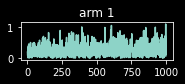

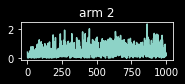

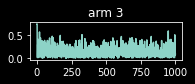

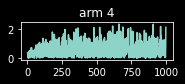

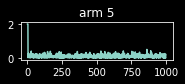

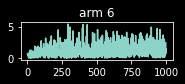

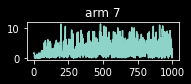

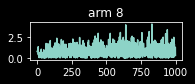

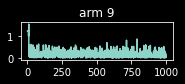

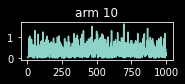

In [5]:
abs_estimate_plotter(N_time_0, R_time_0)

# CASE 1
## EPSILON=0.01

In [6]:

#if two arms have the same Q value, then we will prefer the arm at the lower index.
#players are independent of each other, hence we reset all values for every player.
#Assuming 'e' will only have 2 decimal points. ==> 0.xy or 0.x form only
e= 0.01

R_time_1=np.zeros((10,1000)) #Sum of reward for every arm over 2000 trials at every time step t.
N_time_1=np.zeros((10,1000)) #Number of times, an arm is picked at time 't' over all 2000 trials.


#Keep record of Rt for every player, so you can calculate average Rt.
Rt_for_every_player_1= np.zeros((2000,1000))

#Generate a list, to get explore ith probabilty 'e' and 'exploit' with probability '1-e'.

L=  ['exploit']*(int(100*(1-e))) + (['explore']*(int(100*e)))
random.shuffle(L)

#The main algo begins
for player in range(2000):
    N=[0]*10
    Q=[0]*10
    for t in range(1000):

        what_to_do_pos= np.random.randint(100)
        what_to_do= L[what_to_do_pos]

        if(what_to_do=='exploit'):
            arm_to_pick= np.argmax(Q)

        else:
            arm_to_pick= np.random.randint(10)



        #Now we got our reward at time step t.
        Rt= np.random.normal(true_mean_for_ten_arms[arm_to_pick],4)



        #Now we update the Q value for this arm which we picked

        temp= Q[arm_to_pick]*N[arm_to_pick]
        temp+=Rt
        N[arm_to_pick]+=1
        Q[arm_to_pick]= temp/N[arm_to_pick]

        #Note the reward received at time 't' for every player.
        Rt_for_every_player_1[player][t]=Rt

        
        #For plotting expected value for every arm as a function of time steps.
        R_time_1[arm_to_pick][t]+=Rt
        N_time_1[arm_to_pick][t]+=1
        
        
#We need average reward for every time step.
average_reward_list_1=[]
for t in range(1000):
    total_reward_at_t=0
    for player in range(2000):

        total_reward_at_t+=Rt_for_every_player_1[player][t]


    average_reward_at_t= total_reward_at_t/2000

    average_reward_list_1.append(average_reward_at_t)


ABSOLUTE ERROR OF EACH ARM AT EVERY TIME STEP 't'


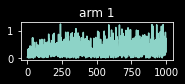

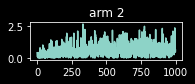

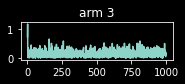

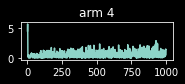

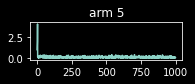

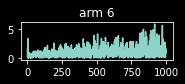

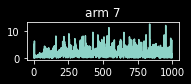

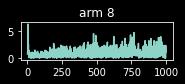

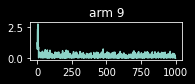

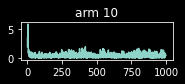

In [7]:
abs_estimate_plotter(N_time_1, R_time_1)

# CASE 2
## EPSILON= 0.1

In [8]:

#if two arms have the same Q value, then we will prefer the arm at the lower index.
#players are independent of each other, hence we reset all values for every player.
#Assuming 'e' will only have 2 decimal points. ==> 0.xy or 0.x form only
e= 0.1

#Let's maintain a Q value list and a number of times an arm is picked list, which is for all 2000 trials.
R_time_2=np.zeros((10,1000)) #Sum of reward for every arm over 2000 trials at every time step t.
N_time_2=np.zeros((10,1000)) #Number of times, an arm is picked at time 't' over all 2000 trials.


#Keep record of Rt for every player, so you can calculate average Rt.
Rt_for_every_player_2= np.zeros((2000,1000))

#Generate a list, to get explore ith probabilty 'e' and 'exploit' with probability '1-e'.

L=  ['exploit']*(int(100*(1-e))) + (['explore']*(int(100*e)))
random.shuffle(L)

#The main algo begins
for player in range(2000):
    N=[0]*10
    Q=[0]*10
    for t in range(1000):

        what_to_do_pos= np.random.randint(100)
        what_to_do= L[what_to_do_pos]

        if(what_to_do=='exploit'):
            arm_to_pick= np.argmax(Q)

        else:
            arm_to_pick= np.random.randint(10)



        #Now we got our reward at time step t.
        Rt= np.random.normal(true_mean_for_ten_arms[arm_to_pick],4)


        #Now we update the Q value for this arm which we picked

        temp= Q[arm_to_pick]*N[arm_to_pick]
        temp+=Rt
        N[arm_to_pick]+=1
        Q[arm_to_pick]= temp/N[arm_to_pick]

        #Note the reward received at time 't' for every player.
        Rt_for_every_player_2[player][t]=Rt


        #For plotting expected value for every arm as a function of time steps.
        R_time_2[arm_to_pick][t]+=Rt
        N_time_2[arm_to_pick][t]+=1
        
        
#We need average reward for every time step.
average_reward_list_2=[]
for t in range(1000):
    total_reward_at_t=0
    for player in range(2000):

        total_reward_at_t+=Rt_for_every_player_2[player][t]


    average_reward_at_t= total_reward_at_t/2000

    average_reward_list_2.append(average_reward_at_t)
    

ABSOLUTE ERROR OF EACH ARM AT EVERY TIME STEP 't'


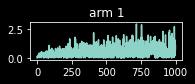

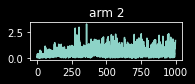

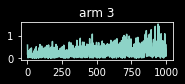

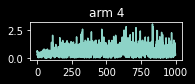

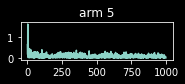

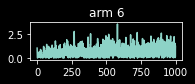

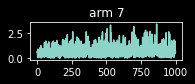

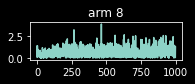

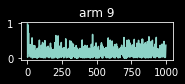

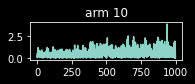

In [9]:
abs_estimate_plotter(N_time_2, R_time_2)

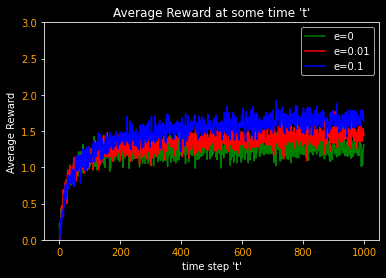

In [10]:
plt.figure(2.2)

plt.title("Average Reward at some time 't'")
plt.style.use('dark_background')
plt.xlabel("time step 't'")
plt.ylabel('Average Reward')
plt.xticks(color='orange')
plt.yticks(color='orange')
plt.ylim(0,3)
plt.plot(range(1000), average_reward_list_0, color='green', label='e=0')
plt.plot(range(1000), average_reward_list_1, color='red', label='e=0.01')
plt.plot(range(1000), average_reward_list_2, color='blue', label='e=0.1')
plt.legend()


In [11]:
optimum_arm=np.argmax(true_mean_for_ten_arms)

"N_time_case saves the information about how many time an arm was picked for all 2000 player's, 1000 trials"


percentage_picked_0=[]

for t in range(1000):
    opt_arm_picked=N_time_0[optimum_arm][t]
    percentage_picked_0.append(100*opt_arm_picked/2000)
    

    
percentage_picked_1=[]

for t in range(1000):
    opt_arm_picked=N_time_1[optimum_arm][t]
    percentage_picked_1.append(100*opt_arm_picked/2000)
    
    
percentage_picked_2=[]

for t in range(1000):
    opt_arm_picked=N_time_2[optimum_arm][t]
    percentage_picked_2.append(100*opt_arm_picked/2000)   
    

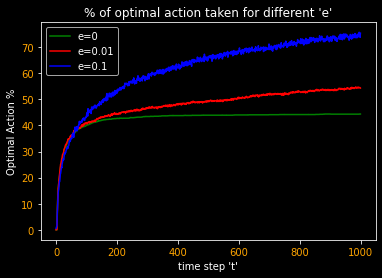

In [12]:
plt.figure(2.2)
plt.title("% of optimal action taken for different 'e'")
plt.style.use('dark_background')
plt.xlabel("time step 't'")
plt.ylabel('Optimal Action %')
plt.xticks(color='orange')
plt.yticks(color='orange')
plt.plot(range(1000), percentage_picked_0, color='green', label='e=0')
plt.plot(range(1000), percentage_picked_1, color='red', label='e=0.01')
plt.plot(range(1000), percentage_picked_2, color='blue', label='e=0.1')
plt.legend()


# VARIABLE  EPSILON

In [13]:
# sum(e(t))=inf | sum(e^2(t))<inf ---eq 2.7

#So we can take e--> e/2 at each time step

#So we can draw 1/e numbers---> out of 1/e numbers : if we draw a zero: then we explore, else we exploit

#Let's start with e
e=1
# e=1/(t+2)

#Let's maintain a Q value list and a number of times an arm is picked list, which is for all 2000 trials.
R_time_3=np.zeros((10,1000)) #Sum of reward for every arm over 2000 trials at every time step t.
N_time_3=np.zeros((10,1000)) #Number of times, an arm is picked at time 't' over all 2000 trials.


#Keep record of Rt for every player, so you can calculate average Rt.
Rt_for_every_player_3= np.zeros((2000,1000))


#The main algo begins
for player in range(2000):
    N=[0]*10
    Q=[0]*10
    e=1
    
    for t in range(1000):
        
        what_to_do= np.random.randint(1/e)
        

        if(what_to_do!=0):
            arm_to_pick= np.argmax(Q)

        else:
            arm_to_pick= np.random.randint(10)


        #Each arm has n values in its distribution and we need to randomly pick one.

        #Now we got our reward at time step t.
        Rt= np.random.normal(true_mean_for_ten_arms[arm_to_pick],4)



        #Now we update the Q value for this arm which we picked

        temp= Q[arm_to_pick]*N[arm_to_pick]
        temp+=Rt
        N[arm_to_pick]+=1
        Q[arm_to_pick]= temp/N[arm_to_pick]

        #Note the reward received at time 't' for every player.
        Rt_for_every_player_3[player][t]=Rt


        #For plotting expected value for every arm as a function of time steps.
        R_time_3[arm_to_pick][t]+=Rt
        N_time_3[arm_to_pick][t]+=1
        
        #update e
        e=1/(t+2)
        
#We need average reward for every time step.
average_reward_list_3=[]
for t in range(1000):
    total_reward_at_t=0
    for player in range(2000):

        total_reward_at_t+=Rt_for_every_player_3[player][t]


    average_reward_at_t= total_reward_at_t/2000

    average_reward_list_3.append(average_reward_at_t)




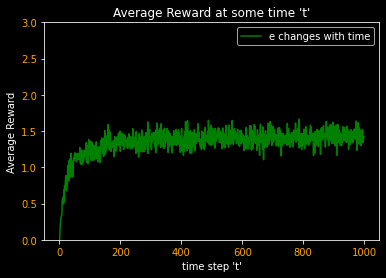

In [14]:
plt.figure(2.2)
plt.style.use('dark_background')

plt.title("Average Reward at some time 't'")
plt.xlabel("time step 't'")
plt.ylabel('Average Reward')
plt.xticks(color='orange')
plt.yticks(color='orange')
plt.ylim(0,3)
plt.plot(range(1000), average_reward_list_3, color='green', label='e changes with time')

plt.legend()


Text(0.5, 1.0, "Percentage optimum for variable 'e' ")

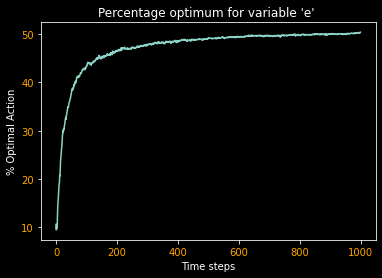

In [15]:
percentage_picked_3=[]

for t in range(1000):
    opt_arm_picked=N_time_3[optimum_arm][t]
    percentage_picked_3.append(100*opt_arm_picked/2000)   
    
plt.plot(range(1000), percentage_picked_3)
plt.xticks(color='orange')
plt.yticks(color='orange')
plt.xlabel('Time steps')
plt.ylabel('% Optimal Action')

plt.title("Percentage optimum for variable 'e' ")